<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/JADE_and_H_P_FRANNK_TOGETHER/d30_JADE_AND_Pop_H_Frannk_Noisy_Quartic_3000_0_5F_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight


In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One


In [3]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=30 #00 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

#fator = 1.0/3.0; 
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/2.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [4]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [5]:
!pip install PyFDE

In [6]:
#!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
#%cd Raianars_paper_One

!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

fatal: destination path 'Raianars_Routines' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [7]:
############################### Função
import FunctionsNew
#'''  
############################### Função
dim=30 # 
fchoice='Noisy_Quartic'
Fun=FunctionsNew.Noisy_Quartic
MAX=np.repeat(1.28,dim)
MIN=np.repeat(-1.28,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [8]:
import pyfde
solver = pyfde.JADE(Fun, n_dim= dim, n_pop=NPAR, limits=bounds, minimize=True)
solver.p = 0.05
solver.c = 0.1

In [9]:
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]

In [10]:
start_time = time.time()
BEST_AGENTS=[]
BEST_FIT =[]
rows = RUNS
cols = dim + 1
BEST_XY = np.zeros((rows,cols))
for iii in range(RUNS):
  best, fit = solver.run(n_it=ITE)
  kkk = -1
  for xi in best:
    kkk = kkk +1
    BEST_XY[iii,kkk] = xi
  BEST_XY[iii,dim] = -fit
  BEST_AGENTS.append(best)
  TIME = (time.time() - start_time) /60
  BEST_FIT.append(-fit)
  print('ite ', iii,'time ', TIME,'fob =', -fit)
    
############################## Cálculo dos Parâmetros de Avaliação   
JADE_TIME = (time.time() - start_time)/RUNS

ite  0 time  0.00021297931671142577 fob = 0.0013673019615314088
ite  1 time  0.00047889947891235354 fob = 0.0006173772643448248
ite  2 time  0.0007560094197591146 fob = 0.0006173772643448248
ite  3 time  0.0010283589363098145 fob = 0.0006173772643448248
ite  4 time  0.0012779593467712401 fob = 0.0005265110866898057


In [11]:
IND_XY = np.argsort(np.array(BEST_XY[:,-1]))
BEST_XY = BEST_XY[IND_XY,:]

In [12]:
JADE_BEST=BEST_XY[0]
JADE_WORSE=BEST_XY[-1]
JADE_MEAN=np.mean(BEST_XY,axis=0)
JADE_MAXFO=BEST_XY[:,-1].max()
JADE_MINFO=BEST_XY[:,-1].min()
JADE_STD=BEST_XY[:,-1].std()
JADE_BEST=BEST_XY[(rows-1),(cols-1)]

In [13]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/ANN_read_matrix


In [14]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [15]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [16]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [17]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [18]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [19]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [20]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.5
Npar1= 52
Npar2= 16
Npar3= 16
Npar4= 16
Npar= 100


In [21]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 0.006401654084523519 FO= 0.00876327503070675
k= 1 time= 0.013566243648529052 FO= 0.1178233607682946
k= 2 time= 0.020604618390401206 FO= 0.011934775433729913
k= 3 time= 0.027204020818074545 FO= 0.12867954443196167
k= 4 time= 0.0338076909383138 FO= 0.028542897806035986


In [22]:
#len(X2[1,:])
print(cols)

3


In [23]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [24]:
pd.set_option('display.max_columns', 30)  
print(df)

    DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0           1.146489     0.891467  0.115556         2.0      0.0  52.0   
1           0.989479     0.769382  0.231111         1.0      2.0  52.0   
2           0.922844     0.717569  0.346667         2.0      2.0  52.0   
3           0.781604     0.607746  0.462222         2.0      2.0  52.0   
4           0.701221     0.545243  0.577778         1.0      2.0  52.0   
5           0.625012     0.485986  0.693333         2.0      2.0  52.0   
6           0.592354     0.460592  0.808889         2.0      2.0  52.0   
7           0.573647     0.446046  0.924444         1.0      2.0  52.0   
8           0.531082     0.412949  1.002222         2.0      2.0  52.0   
9           0.527018     0.409789  1.002222         2.0      2.0  52.0   
10          0.522766     0.406483  1.002222         1.0      2.0  52.0   
11          0.528569     0.410995  1.002222         1.0      2.0  52.0   
12          0.523701     0.407210  1.0

Text(0, 0.5, 'CR')

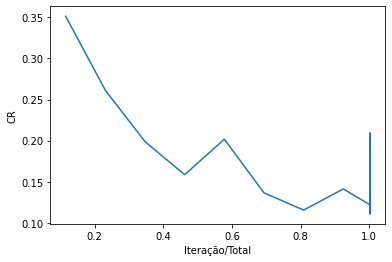

In [25]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

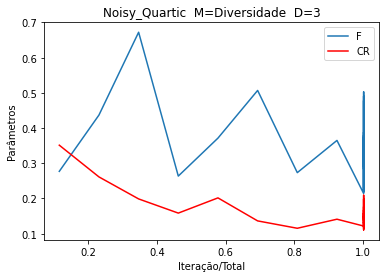

In [26]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Noisy_Quartic_Diversidade_D=3')

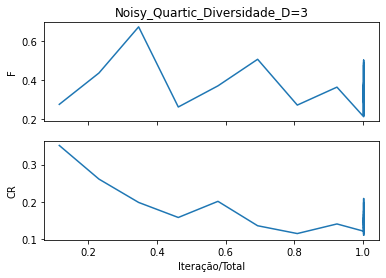

In [27]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [28]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

print('======== JADE ==============')
print('MÉDIA: ',JADE_MEAN[-1])
print('MIN __:',JADE_MINFO)
print('MAX__: ',JADE_MAXFO)
print('STD __:',JADE_STD)
print("Tempo Médio= %.3f segundos ---" % (JADE_TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',JADE_BEST)

print(JADE_MEAN[-1])
print(JADE_STD)
print(JADE_MINFO)

print('================================')

MCS-FRANNK Fator F/DE= 0.50 NPAR= 100 Iterações= 30 Dim= 3 Min/Max= -1.28 / 1.28 _ Noisy_Quartic
SUB_Fo-0.5_CRo-0.5_D-3_Interv-30 

MÉDIA:  0.05914877069414578 STD __: 0.052880648622899644
MIN __: 0.00876327503070675 MAX__:  0.12867954443196167
0.05914877069414578
0.052880648622899644
0.00876327503070675
Tempo Médio= 0.406 segundos ---
5 Rodadas

BEST:  [-0.28525454  0.03398587 -0.06665694  0.00876328]
======== JADE ==============
MÉDIA:  0.0007491889682511378
MIN __: 0.0005265110866898057
MAX__:  0.0013673019615314088
STD __: 0.00031105372116680926
Tempo Médio= 0.016 segundos ---
5 Rodadas

BEST:  0.0013673019615314088
0.0007491889682511378
0.00031105372116680926
0.0005265110866898057


In [32]:
print('FRANNK POP H                 JADE')
print(MEAN[-1],'       ',JADE_MEAN[-1])
print(STD,'      ',JADE_STD)
print(MINFO,'       ',JADE_MINFO)


FRANNK POP H                 JADE
0.05914877069414578         0.0007491889682511378
0.052880648622899644        0.00031105372116680926
0.00876327503070675         0.0005265110866898057
